In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
from datetime import datetime
import glob
import os

In [ ]:
df = pd.read_csv("local/data/cali_consolidado_2007_2020.csv", index_col = 0, parse_dates= True)

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
#GRAFICAS: 
#PROMEDIO ANUAL
#CADA SERIE COMPLETA

#CORRELACIONES INICIALES
#CORRELACIONES CON DESFASES
#AUTOCORRELACIONES
#FILLING GAPS, WITH FULL DETAIL.

municipality = "Cali"

In [ ]:
def plot_time_series(dates_array, values_array,  labels, colors, title, x_label, y_label, kind = "lineplot", fulldates = False):
    """
    dates: must be an array of datetime series for the x axis
    values: the array of y axis values to plot
    labels: the array of labels for each plot
    title: string that goes above the plot
    x_label: string that goes on the x-axis
    y_label: string that goes on the y-axis
    kind: the type of the graph
    fulldates: if the plot is going to receive full dates or just numbers.
    """
    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(12,5), dpi = 150)

    ax.ticklabel_format(axis='y', style='plain')
    if fulldates:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)
    
    for i in range(len(dates_array)):
        if kind == "lineplot":
            sns.lineplot(x=dates_array[i], y=values_array[i],  label = labels_array[i], color = colors[i], ax = ax)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

# TEMPERATURE PLOTS

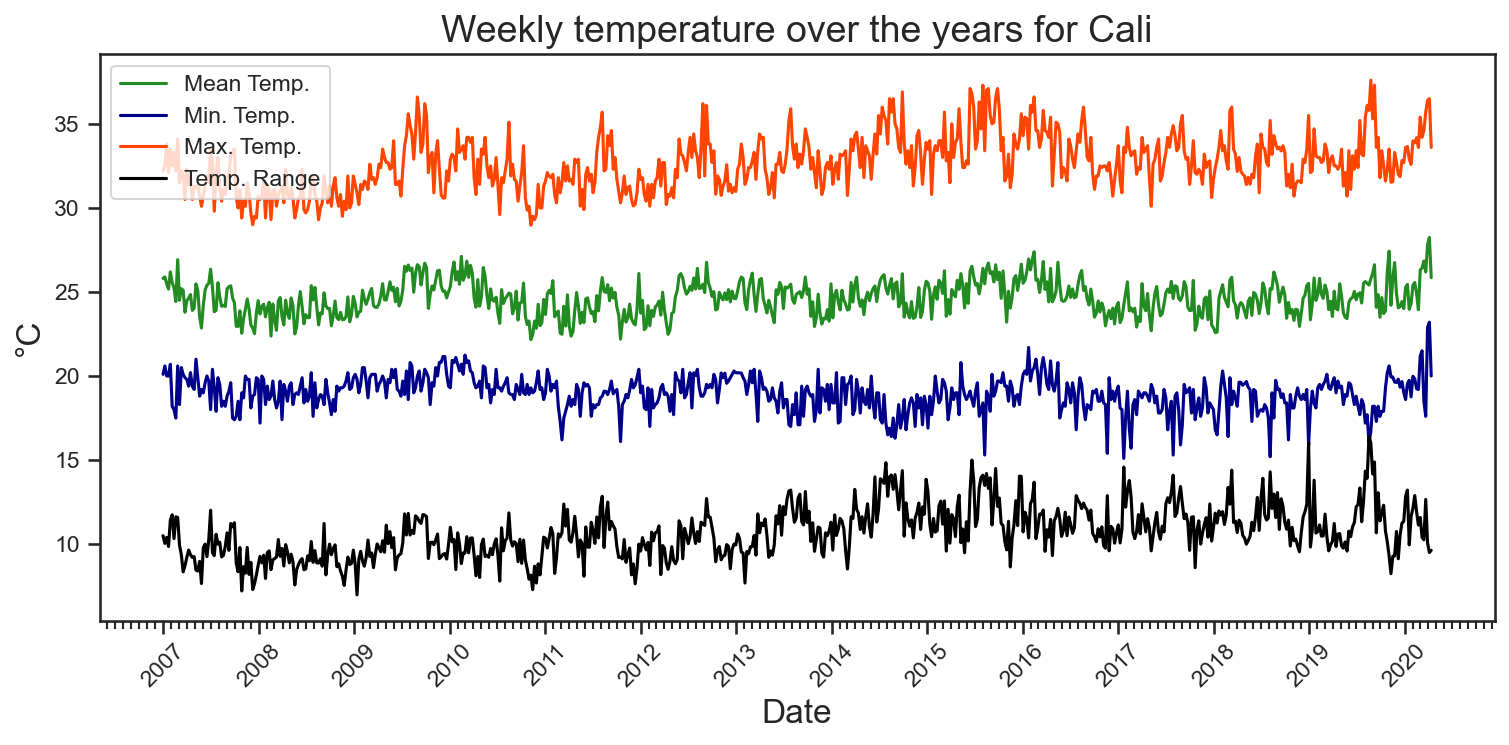

In [ ]:
x_array = [df.index]*4
y_array = [df["TEMPERATURE_MEAN"], df["TEMPERATURE_AMIN"],df["TEMPERATURE_AMAX"] , df["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Weekly temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

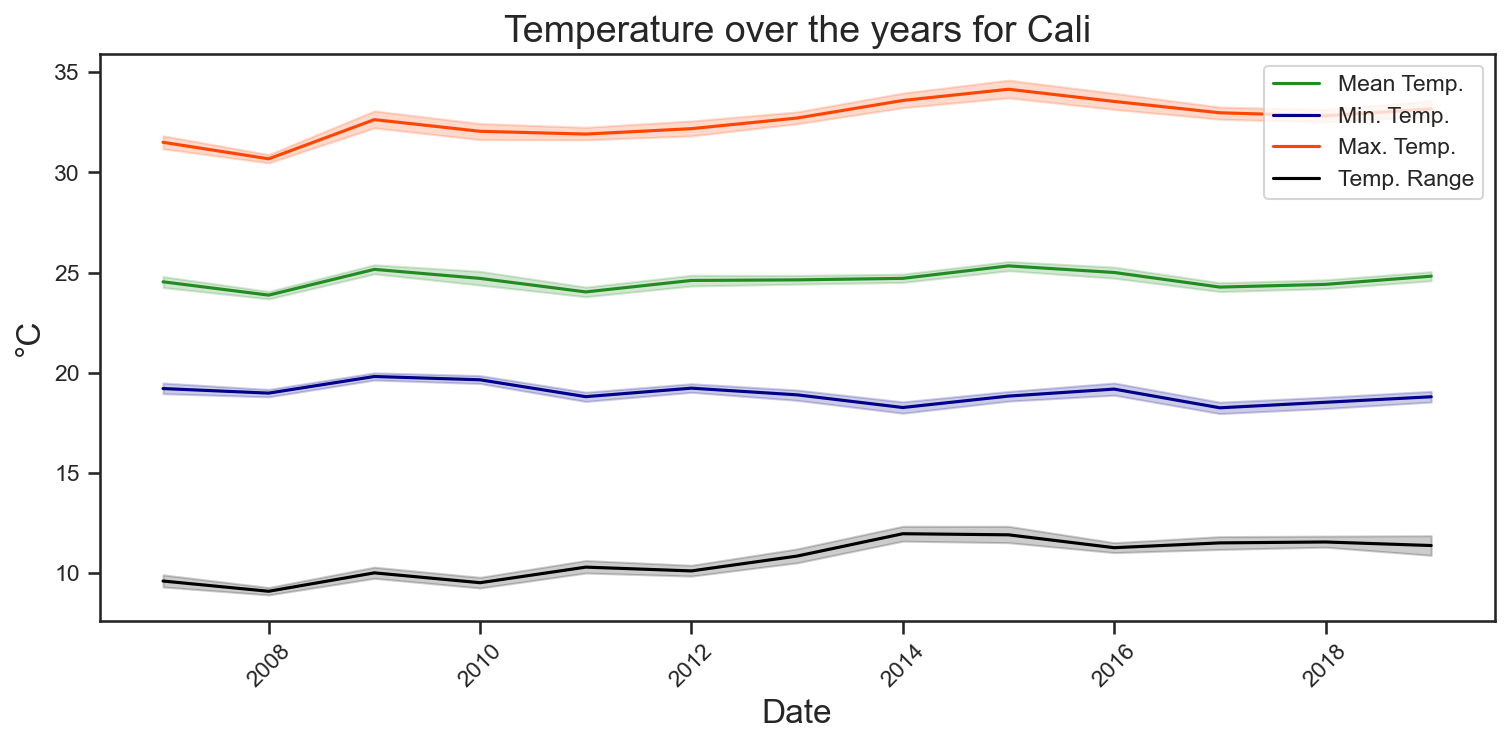

In [ ]:
df_filt = df[(df["ANO"]>=2007) & (df["ANO"]<=2019)]
x_array = [df_filt["ANO"]]*4
y_array = [df_filt["TEMPERATURE_MEAN"], df_filt["TEMPERATURE_AMIN"],df_filt["TEMPERATURE_AMAX"] , df_filt["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot")

Text(0.5, 0, 'Month')

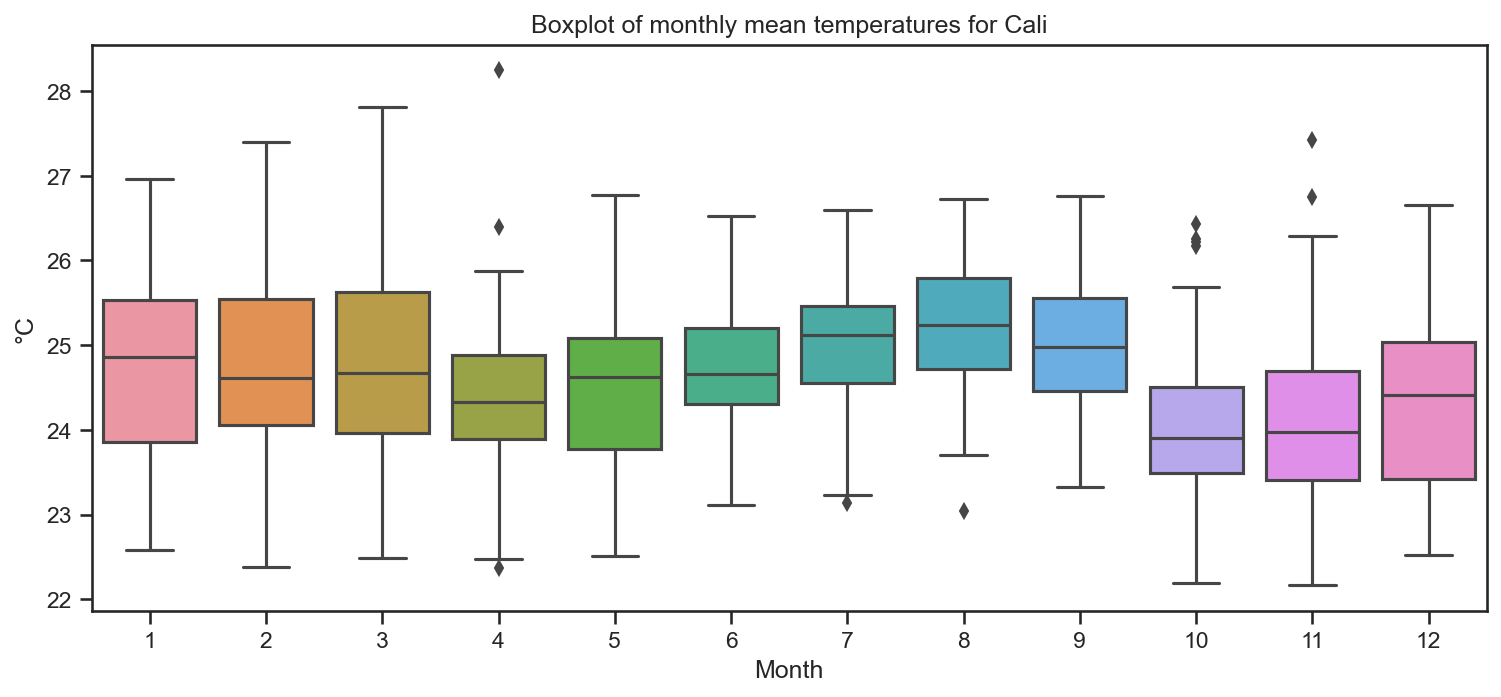

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["TEMPERATURE_MEAN"])
axes.set_title("Boxplot of monthly mean temperatures for " + municipality)
axes.set_ylabel("°C")
axes.set_xlabel("Month")

# HUMIDITY PLOTS

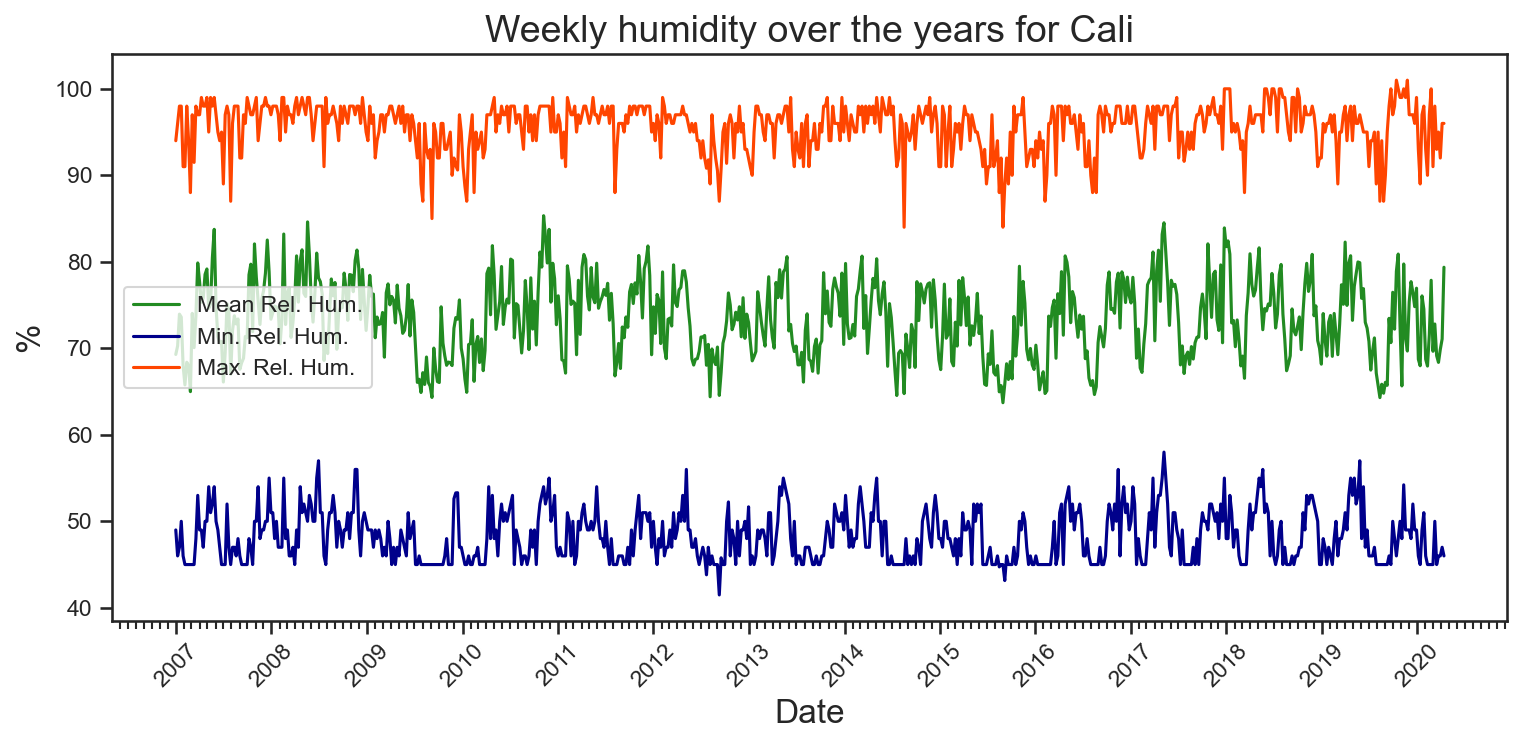

In [ ]:
x_array = [df.index]*3
y_array = [df["REL_HUMIDITY_MEAN"], df["REL_HUMIDITY_AMIN"],df["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Weekly humidity over the years for " + municipality
colors = ["forestgreen","darkblue","orangered"]
ylabel = "%"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

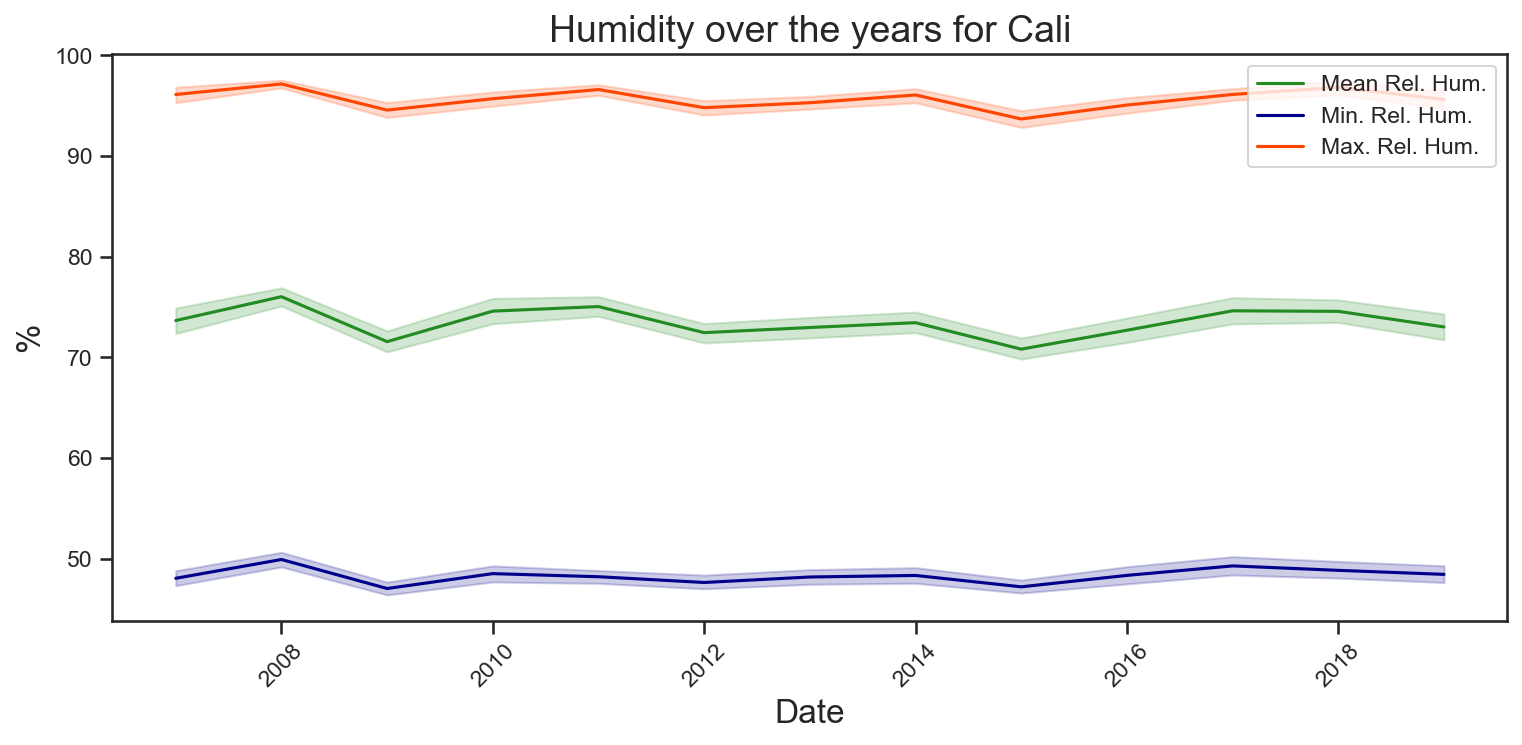

In [ ]:
x_array = [df_filt["ANO"]]*3
y_array = [df_filt["REL_HUMIDITY_MEAN"], df_filt["REL_HUMIDITY_AMIN"],df_filt["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Humidity over the years for " + municipality
ylabel = "%"
xlabel = "Date"
colors = ["forestgreen","darkblue","orangered"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

Text(0.5, 0, 'Month')

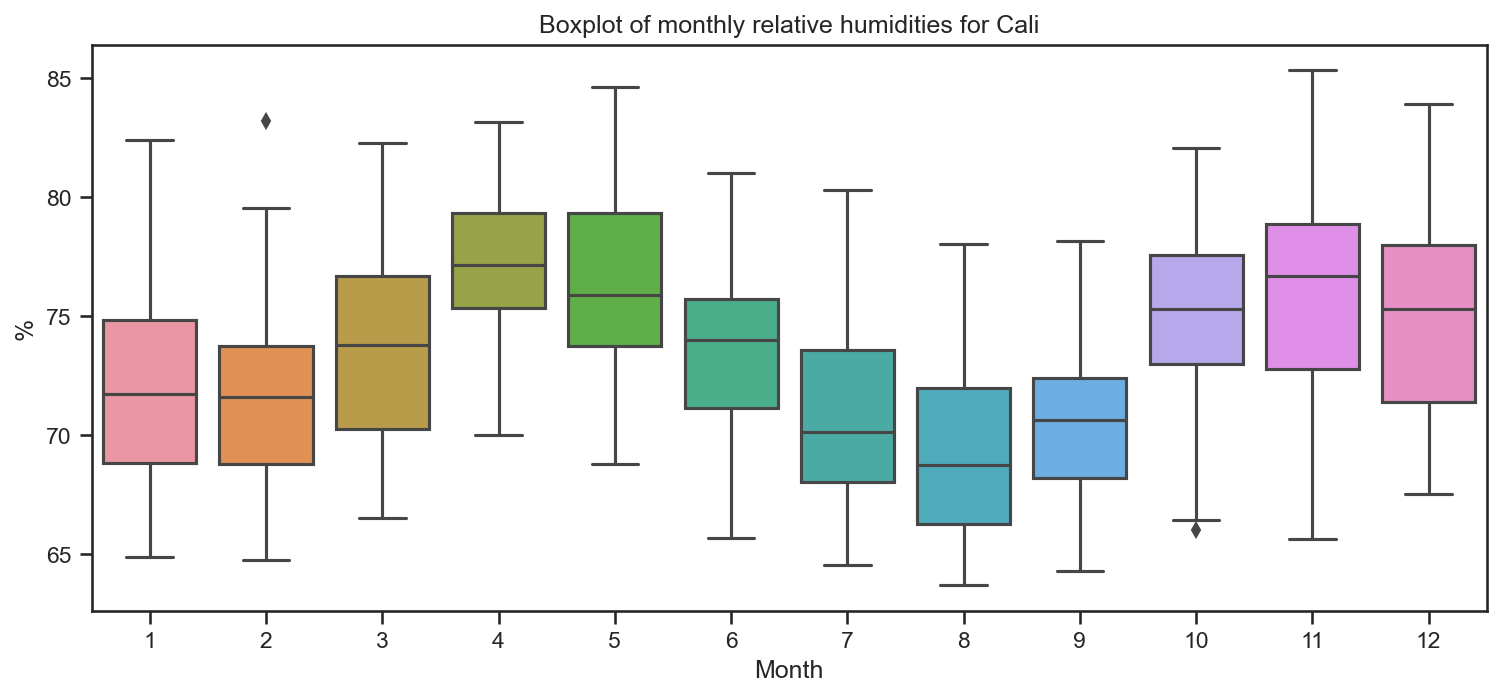

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["REL_HUMIDITY_MEAN"])
axes.set_title("Boxplot of monthly relative humidities for " + municipality)
axes.set_ylabel("%")
axes.set_xlabel("Month")

# PRECIPITATION PLOTS

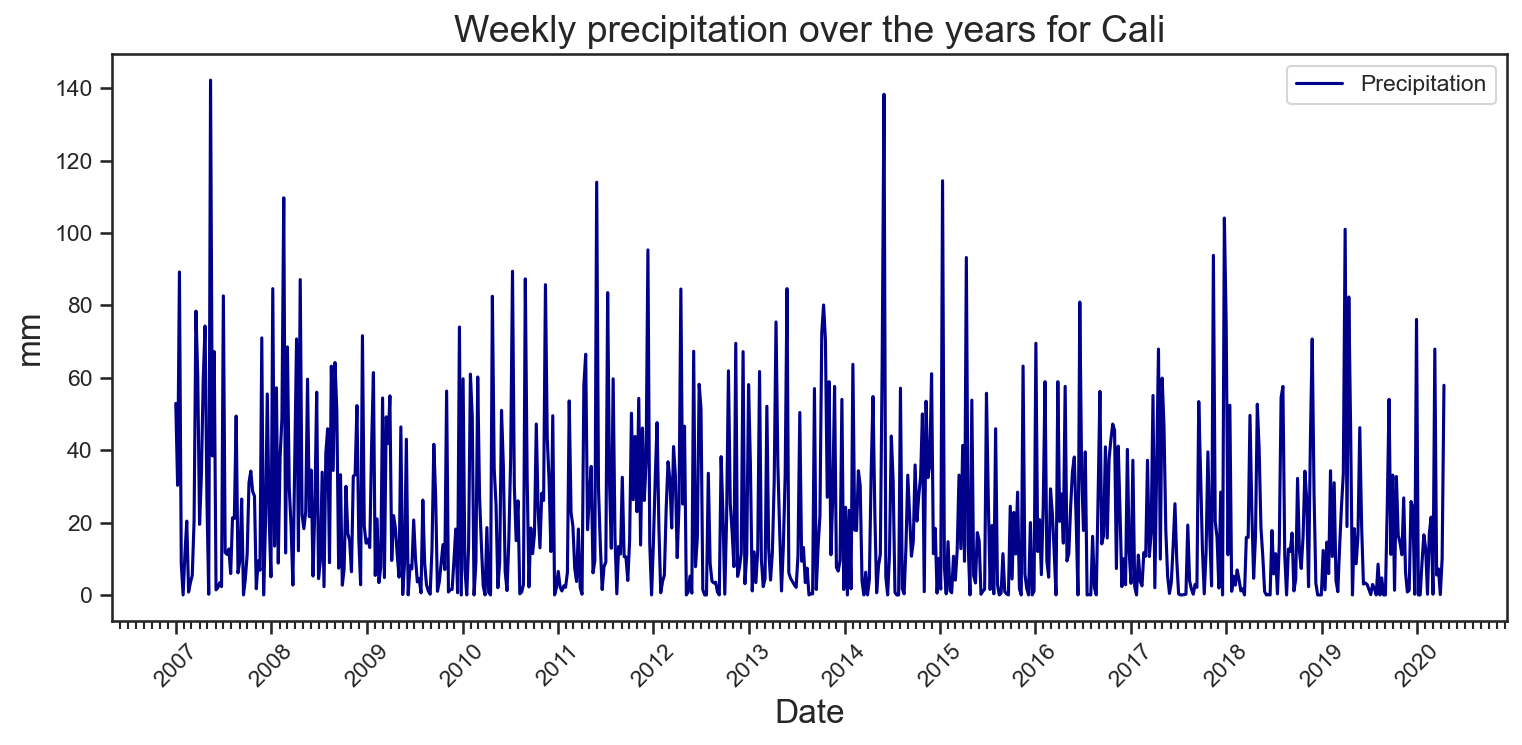

In [ ]:
x_array = [df.index]
y_array = [df["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Weekly precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Date"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

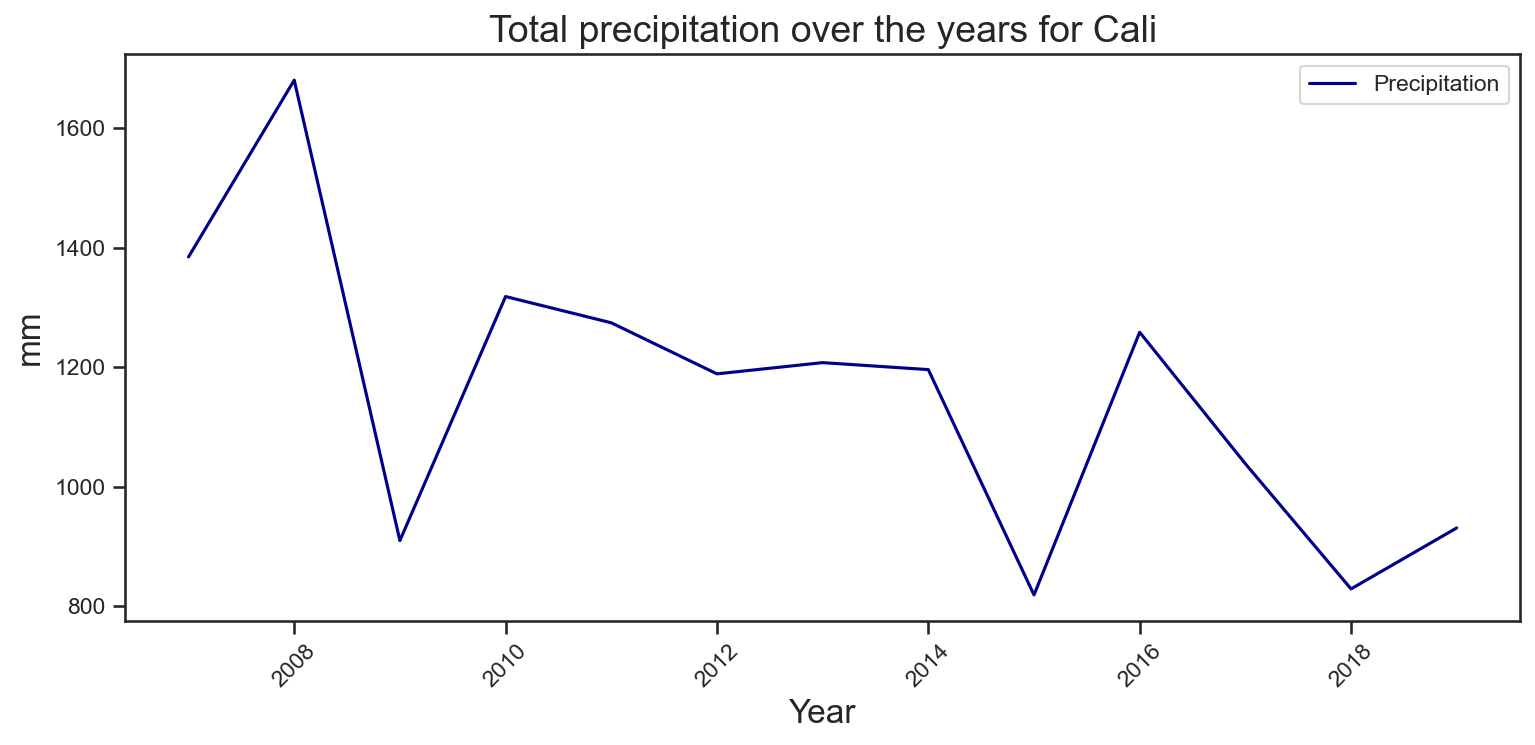

In [ ]:
df_prec_yearly = df.loc[(df.index.year>=2007)&(df.index.year<=2019),["PRECIPITATION","DRY_DAYS"]]
df_prec_yearly = df_prec_yearly.groupby(df_prec_yearly.index.year).sum()
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Total precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Year"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title, xlabel,ylabel, "lineplot", fulldates = False)

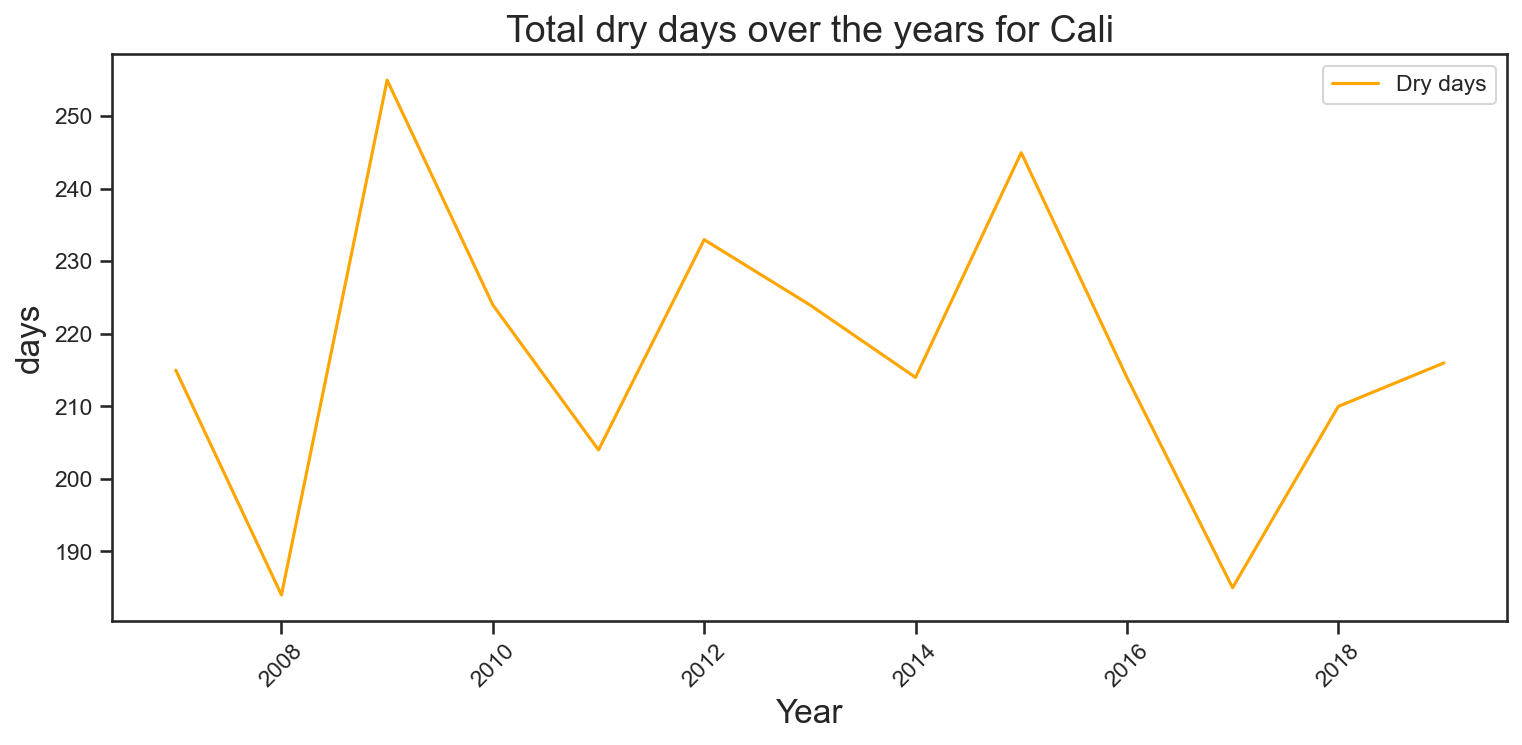

In [ ]:
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["DRY_DAYS"]]
labels_array = ["Dry days"]
title = "Total dry days over the years for " + municipality
ylabel = "days"
xlabel = "Year"
colors = ["orange"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

# NIÑO PLOTS

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

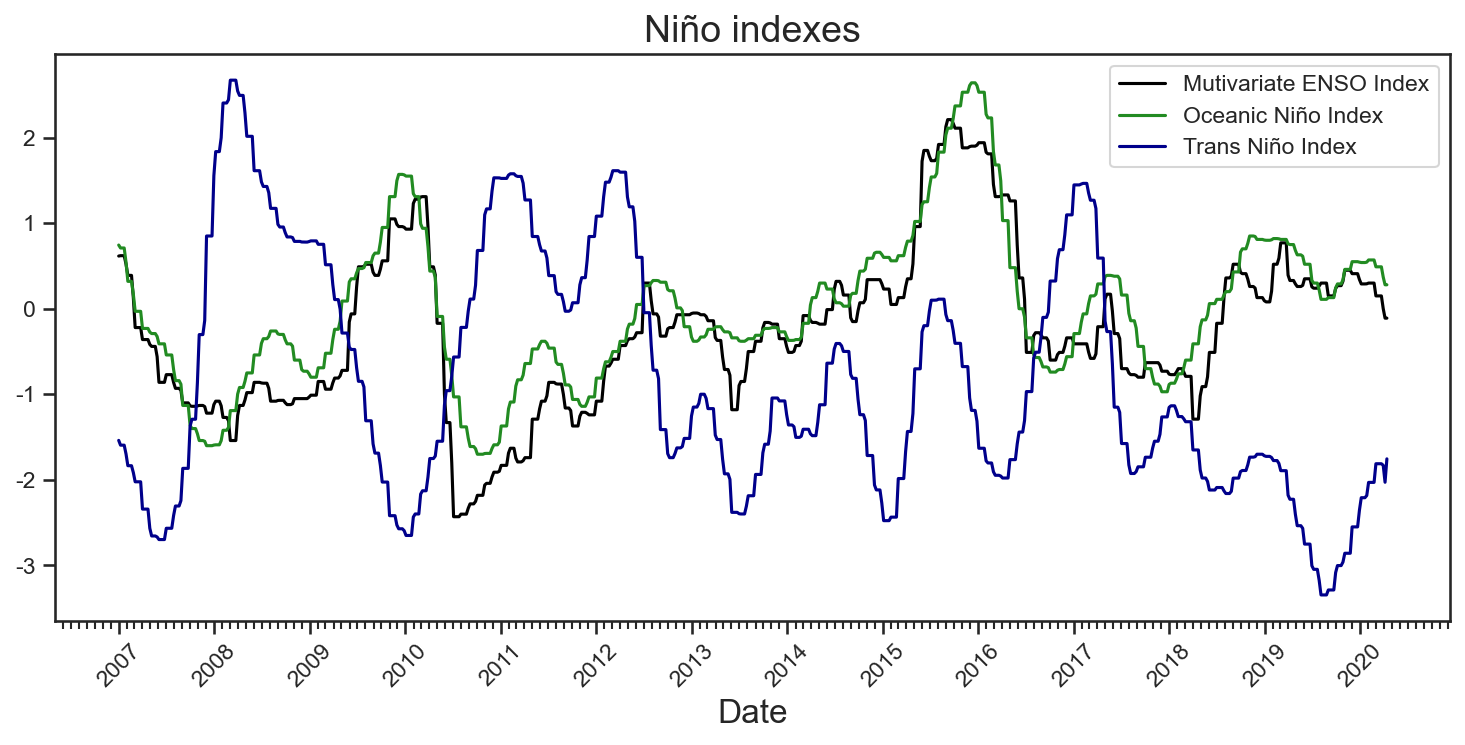

In [ ]:
x_array = [df.index]*3
y_array = [df["MEI"], df["ONI"], df["TNI"]]
labels_array = ["Mutivariate ENSO Index", "Oceanic Niño Index", "Trans Niño Index"]
colors = ["black","forestgreen","darkblue","orangered","cyan","black"]
title = "Niño indexes"
ylabel = ""
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

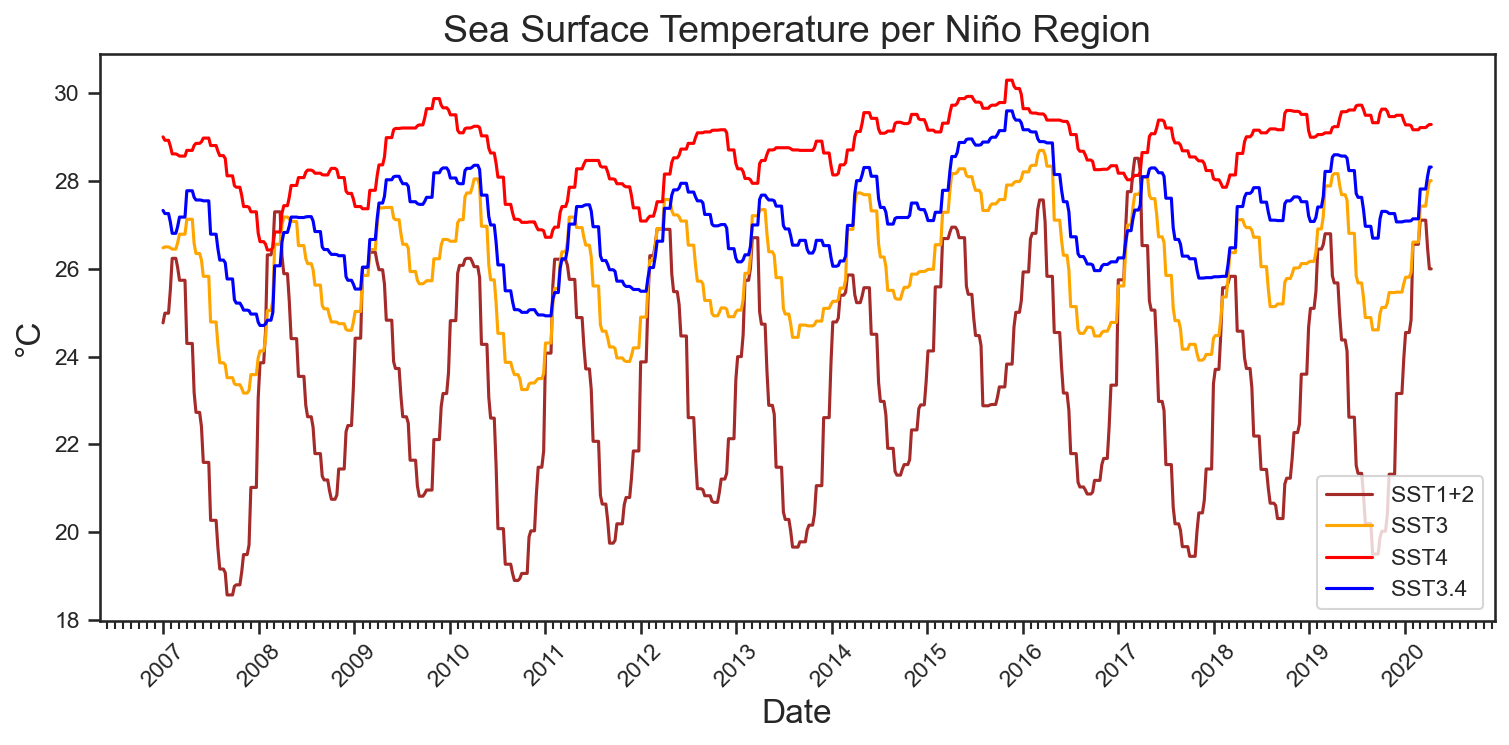

In [ ]:
x_array = [df.index]*4
y_array = [df["SST1+2"], df["SST3"], df["SST4"], df["SST3.4"]]
labels_array = ["SST1+2", "SST3", "SST4", "SST3.4"]
colors = ["brown","orange","red","blue"]
title = "Sea Surface Temperature per Niño Region"
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

# DENGUE PLOTS

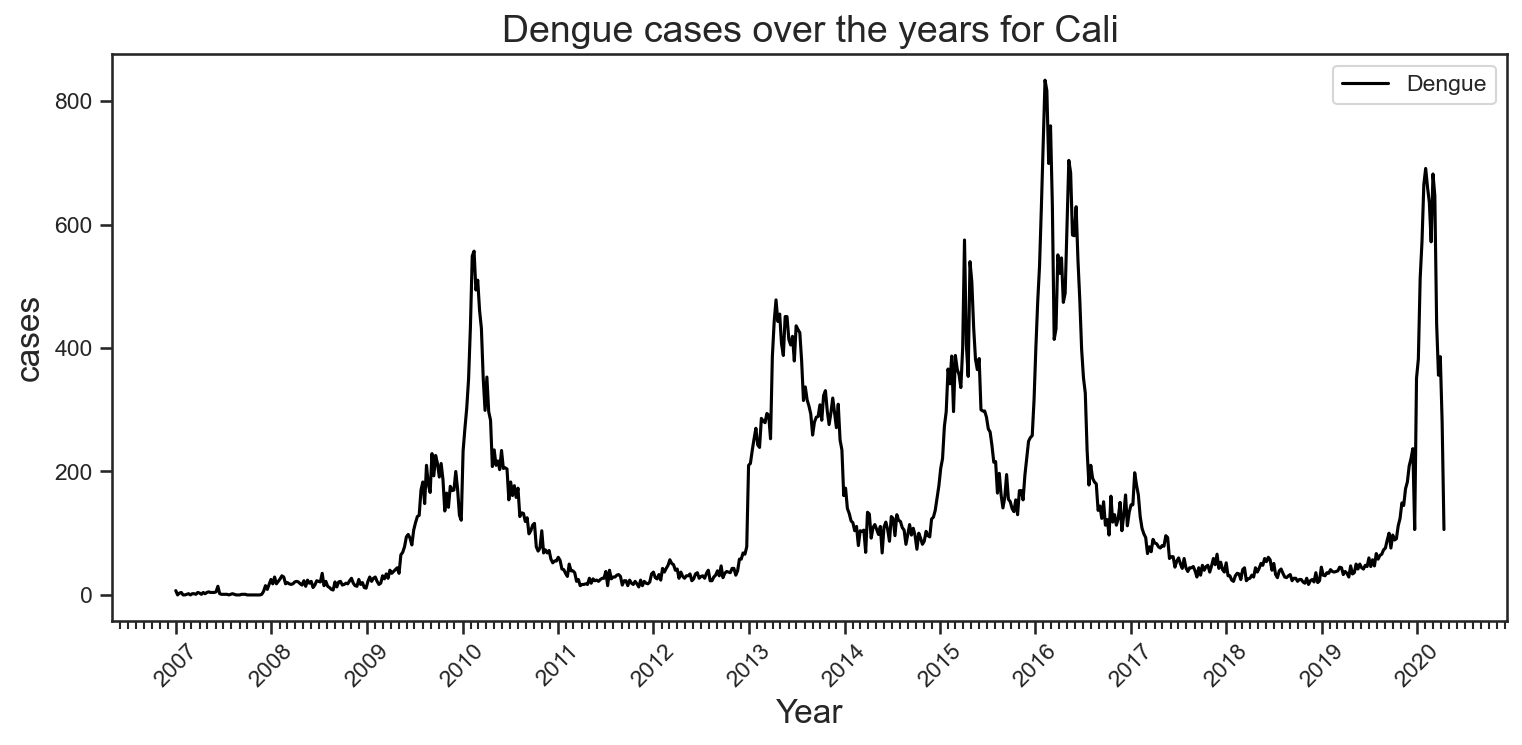

In [ ]:
x_array = [df.index]
y_array = [df["DENGUE"]]
labels_array = ["Dengue"]
title = "Dengue cases over the years for " + municipality
ylabel = "cases"
xlabel = "Year"
colors = ["black"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)


Text(0.5, 0, 'Month')

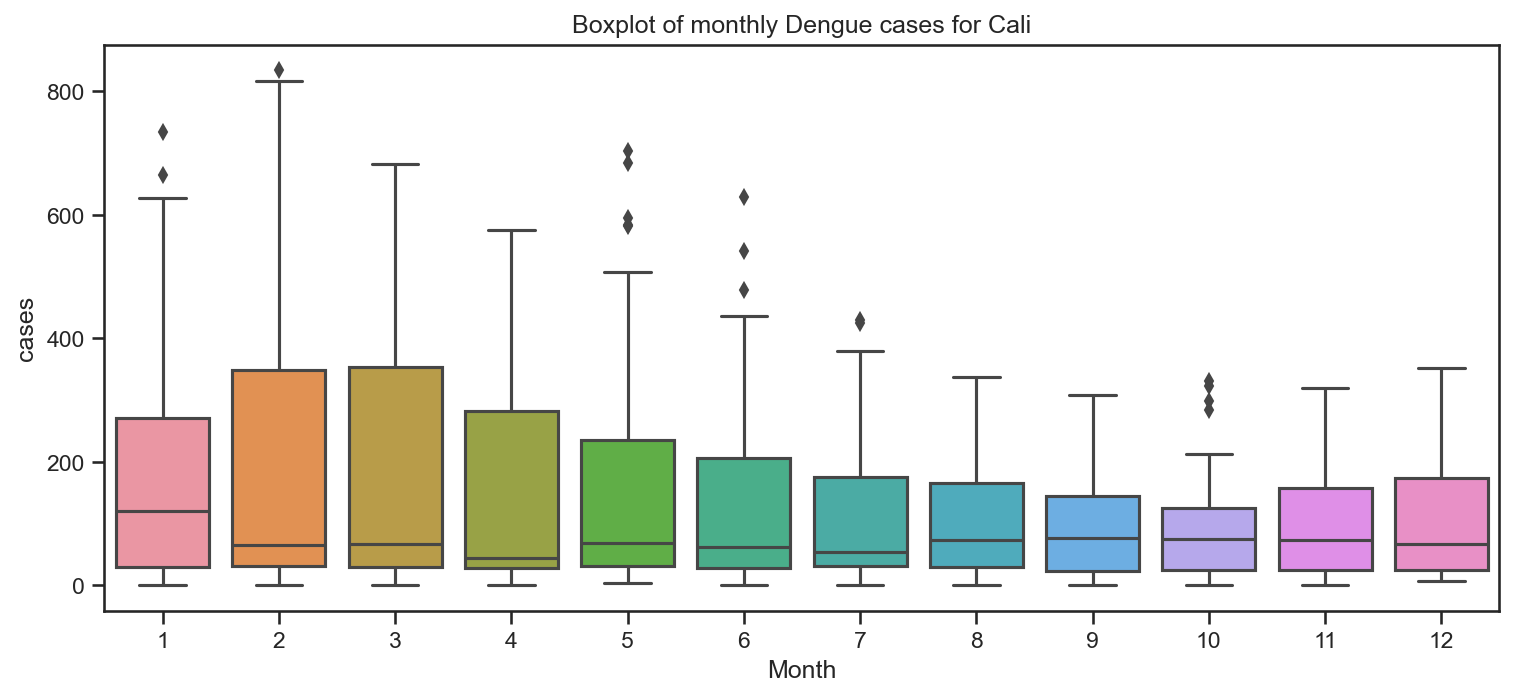

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["DENGUE"])
axes.set_title("Boxplot of monthly Dengue cases for " + municipality)
axes.set_ylabel("cases")
axes.set_xlabel("Month")

# SIMPLE CORRELATION BETWEEN ALL VARIABLES

In [ ]:
df_for_corr = df.drop(columns=['COD_DPTO',"COD_MUNICIPIO","POBLACION", "DENGUE GRAVE","MORTALIDAD POR DENGUE"])

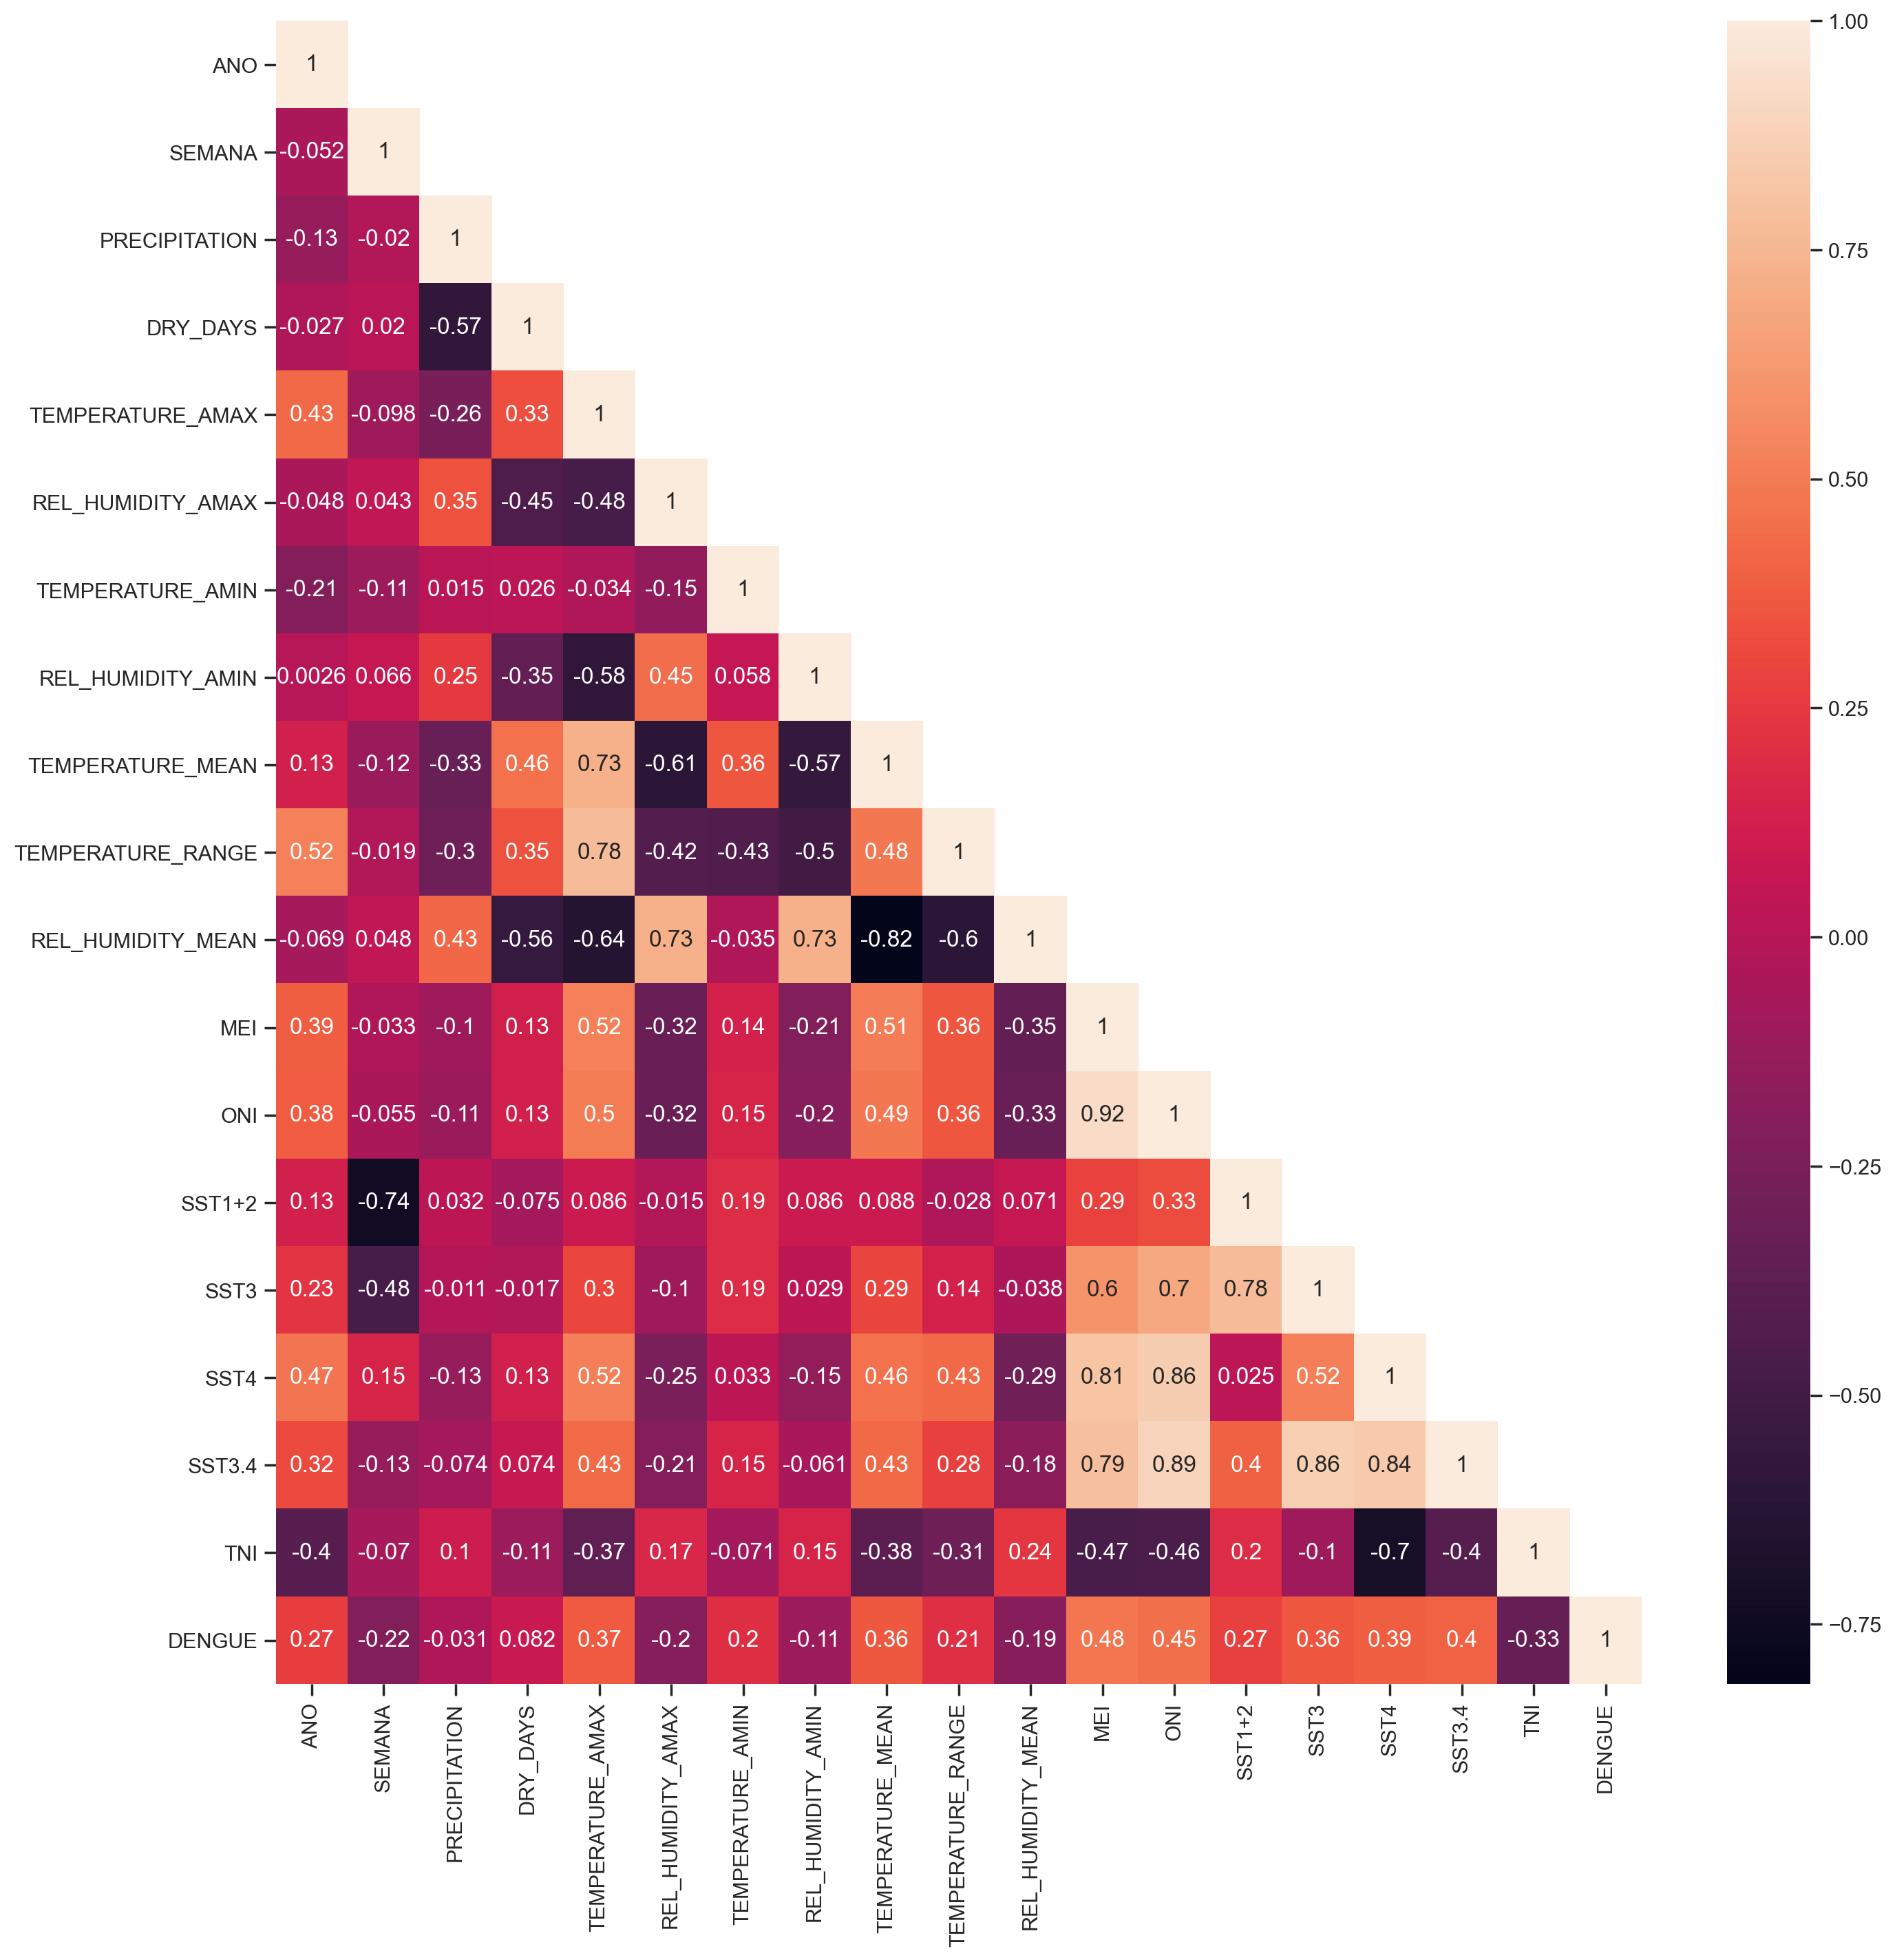

In [ ]:
fig, axs = plt.subplots(1,figsize=(16,16), dpi = 200)
corrMatrix = df_for_corr.corr()
corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that some variables are quite correlated, so we could remove some of these. Interestingly, despite being the closest to Cali the SST for Region 1+2 has the weakest correlation with Dengue cases.

From the correlation matrix we see that variables such as: mean temperature, MEI, ONI, SST4, SST3.4 and TNI are the most correlated with the number of Dengue cases.

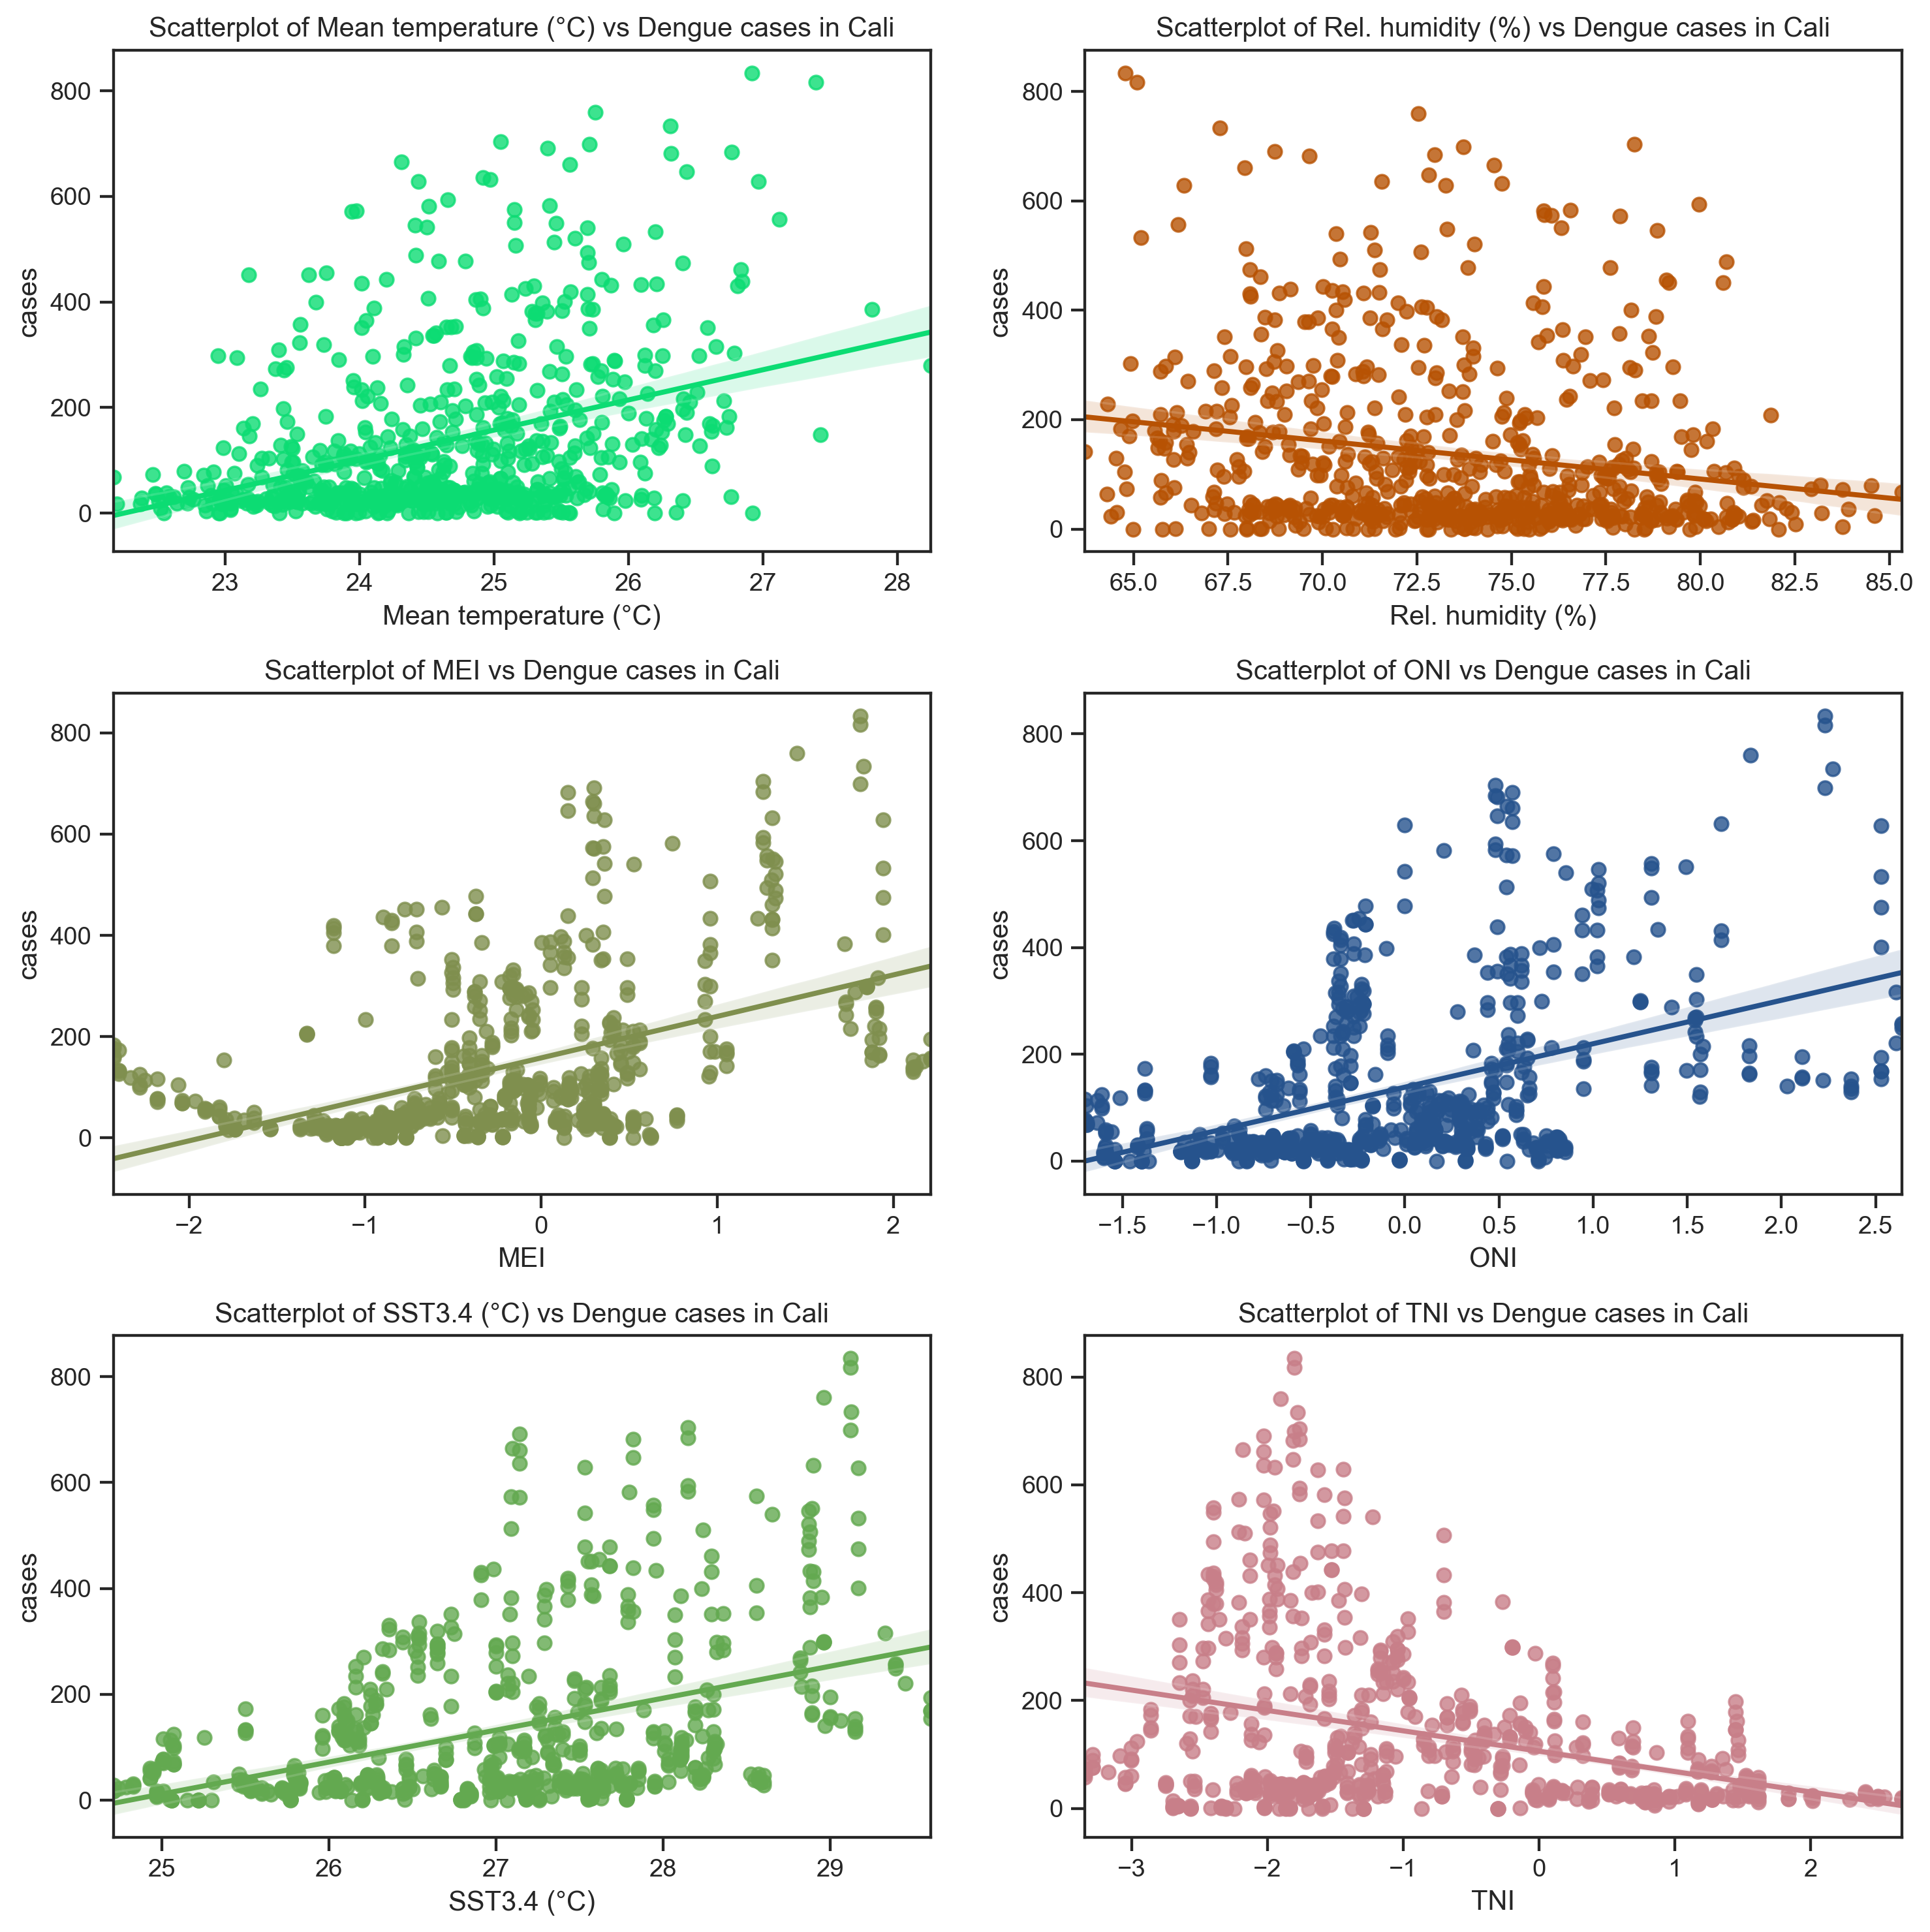

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(12,12), dpi = 250)
axes = axes.flatten()
vars_to_plot = ["TEMPERATURE_MEAN","REL_HUMIDITY_MEAN","MEI","ONI","SST3.4","TNI"]
xlabels  = ["Mean temperature (°C)","Rel. humidity (%)", "MEI", "ONI", "SST3.4 (°C)", "TNI"]
colors = list(mcolors.get_named_colors_mapping().keys())[99:105]
for i,var in enumerate(vars_to_plot):
    sns.regplot(x = df[var], y = df["DENGUE"], ax = axes[i], color = colors[i])
    axes[i].set_title("Scatterplot of "+xlabels[i]+" vs Dengue cases in " + municipality)
    axes[i].set_ylabel("cases")
    axes[i].set_xlabel(xlabels[i])
plt.tight_layout()

# CORRELATION OVER THE YEARS WITH DELAYS BETWEEN THE COVARIATES AND THE DENGUE CASES

In [ ]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [ ]:
def lagged_corr(weeks, var, window):
    return df[str(var)].shift(periods=weeks).iloc[weeks:].corr(df['DENGUE'].iloc[weeks:],
                                                            min_periods=window)
cols = ['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE']

df_corr_melt = pd.melt(df.reset_index().reset_index(), id_vars='index', value_vars=cols)

In [ ]:
df_corr_melt.rename(columns={'index':'lag_size'}, inplace=True)
df_corr_melt = df_corr_melt[df_corr_melt["lag_size"]<=24]

In [ ]:
df_corr_melt['corr'] = df_corr_melt.apply(lambda x: lagged_corr(x.lag_size,
                                                          x.variable, 200), axis=1)

In [ ]:
df_corr_pivot = df_corr_melt.pivot_table(columns='lag_size', index='variable', values='corr')
row_max = np.abs(df_corr_pivot).idxmax(axis=1)
columns = row_max.index

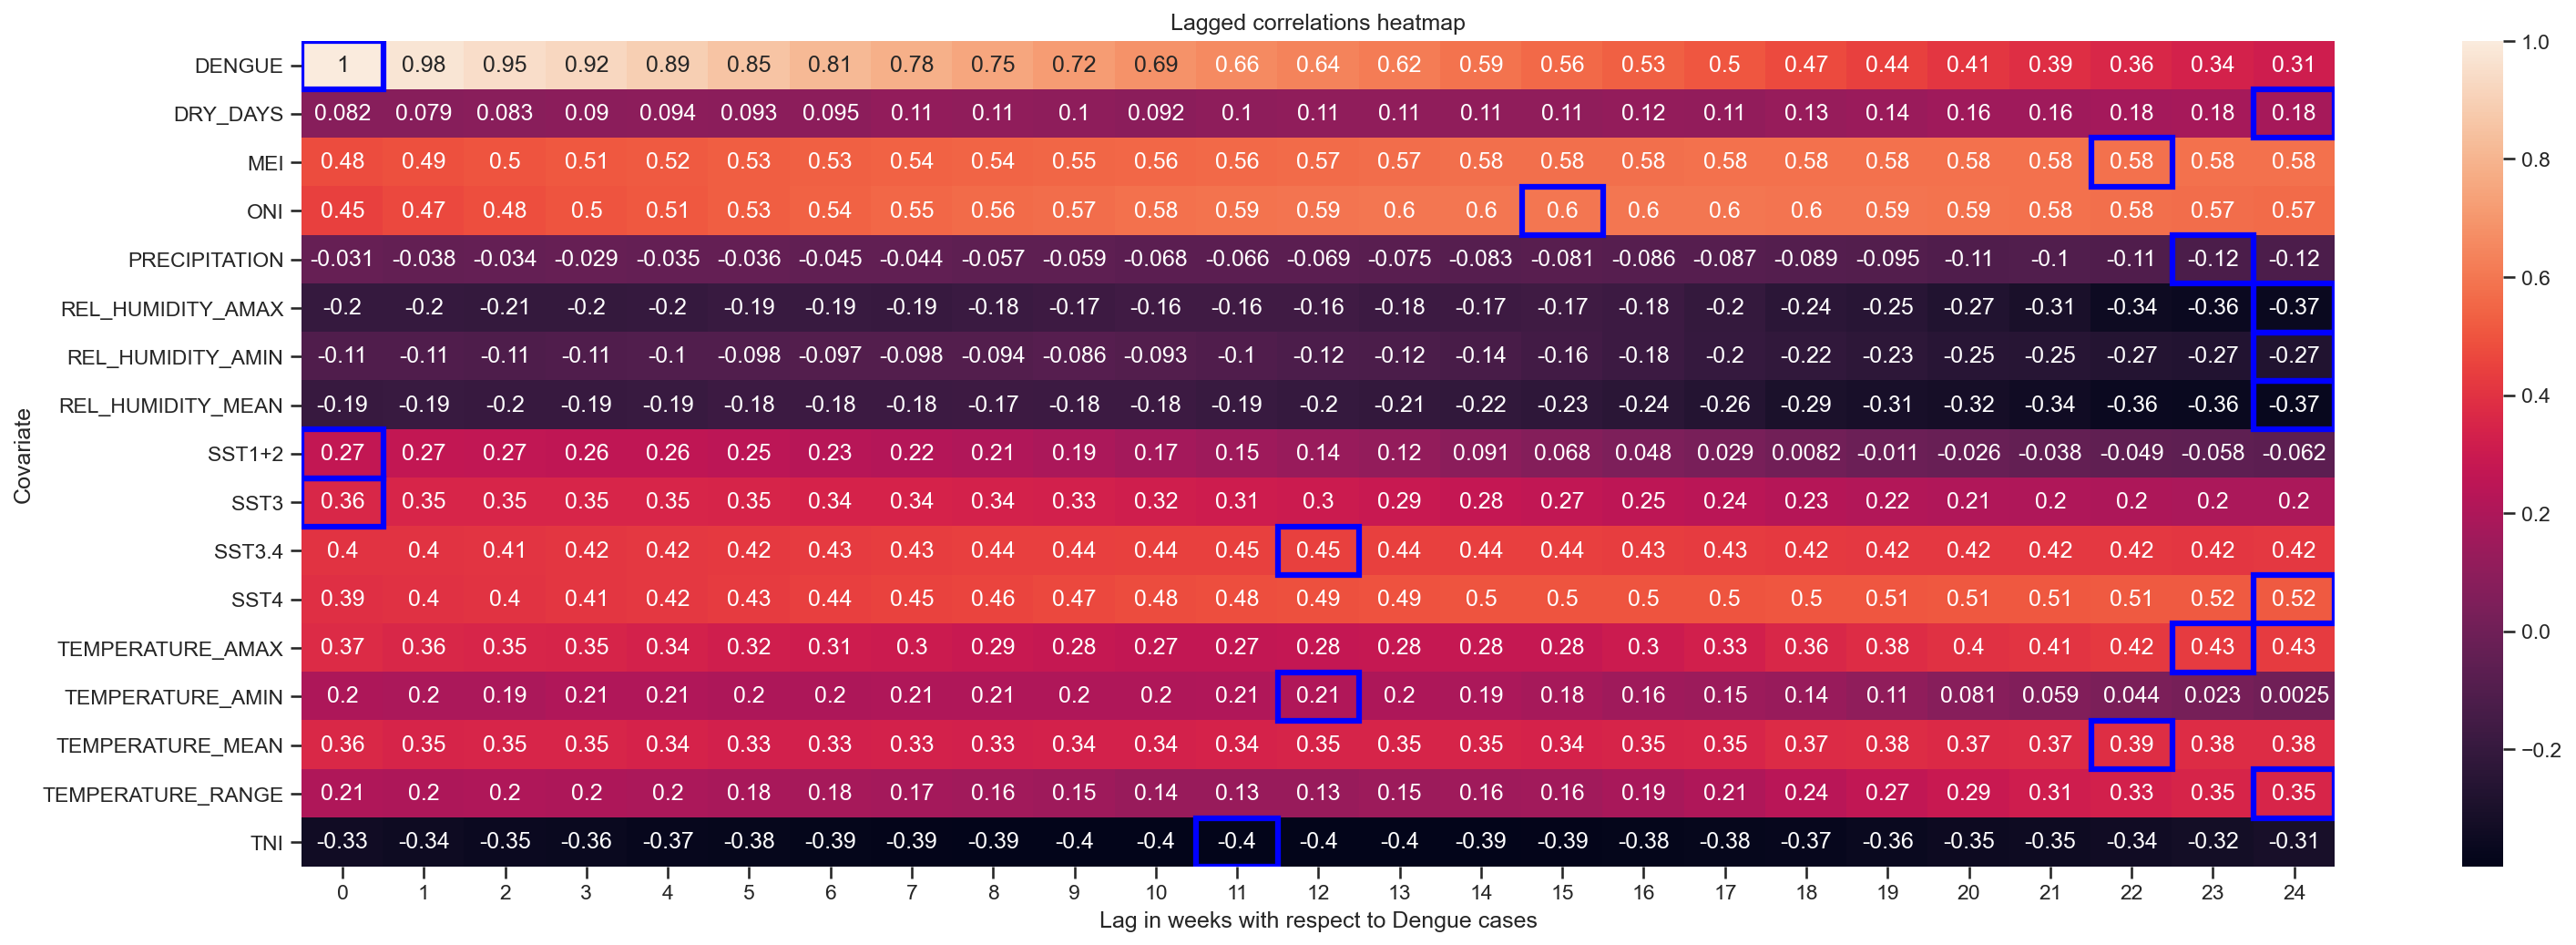

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap")
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


In [ ]:
def obtener_conjunto_desfasado(datos,meses_desfase):
    dat_desfase = datos.copy().reset_index(drop=True)
    for i in range(len(dat_desfase)-meses_desfase):
        dat_desfase.loc[i,"DENGUE_UNPHASED"] = dat_desfase.loc[i+meses_desfase,"DENGUE"]
    quitar_filas = list(range(len(dat_desfase)-meses_desfase,len(dat_desfase)))
    dat_desfase= dat_desfase.drop(dat_desfase.index[quitar_filas])
    return dat_desfase

In [ ]:
df_for_corr_2 = df_for_corr[cols]
phases = [obtener_conjunto_desfasado(df_for_corr_2, i).corr(method='pearson').iloc[:,-1:] for i in range(17)]
phases_confirmed = pd.concat(phases, axis = 1)

In [ ]:
phases_confirmed

DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.018208         0.047915         0.067229   
DRY_DAYS                  0.017043        -0.012418        -0.031132   
TEMPERATURE_AMAX         -0.136278        -0.131677        -0.126868   
REL_HUMIDITY_AMAX         0.118267         0.163132         0.175046   
TEMPERATURE_AMIN         -0.076160        -0.097674        -0.123027   
REL_HUMIDITY_AMIN         0.068188         0.088391         0.093193   
TEMPERATURE_MEAN         -0.114052        -0.122459        -0.120924   
TEMPERATURE_RANGE        -0.024235        -0.023338        -0.003378   
REL_HUMIDITY_MEAN         0.110197         0.150004         0.162276   
MEI                      -0.025960        -0.020957        -0.016836   
ONI                      -0.005550        -0.002982        -0.002004   
SST1+2                   -0.140660        -0.162829        -0.187989   
SST3                     -0.145972        -0.151562        -0.159948   
SST4                     -0.012122        -0.002916         0.005370   
SST3.4                   -0.084081        -0.078743        -0.075171   
TNI                      -0.186890        -0.189915        -0.192734   
DENGUE                    1.000000         0.899216         0.846264   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.081946         0.103271         0.094419   
DRY_DAYS                 -0.058400        -0.082708        -0.104231   
TEMPERATURE_AMAX         -0.124865        -0.125107        -0.119165   
REL_HUMIDITY_AMAX         0.205178         0.239526         0.252157   
TEMPERATURE_AMIN         -0.119393        -0.144357        -0.132078   
REL_HUMIDITY_AMIN         0.104450         0.138401         0.149777   
TEMPERATURE_MEAN         -0.113640        -0.127967        -0.121513   
TEMPERATURE_RANGE        -0.023633        -0.006009        -0.011973   
REL_HUMIDITY_MEAN         0.187729         0.223028         0.232916   
MEI                      -0.012319        -0.008163        -0.004339   
ONI                       0.000210         0.002496         0.003016   
SST1+2                   -0.209674        -0.227367        -0.243718   
SST3                     -0.163215        -0.167773        -0.170493   
SST4                      0.014705         0.021572         0.029692   
SST3.4                   -0.068048        -0.063962        -0.058808   
TNI                      -0.198388        -0.204748        -0.210059   
DENGUE                    0.794769         0.745584         0.713014   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.151500         0.149961         0.159480   
DRY_DAYS                 -0.123357        -0.138739        -0.163473   
TEMPERATURE_AMAX         -0.109268        -0.086920        -0.065091   
REL_HUMIDITY_AMAX         0.272726         0.278262         0.270837   
TEMPERATURE_AMIN         -0.142300        -0.142218        -0.125857   
REL_HUMIDITY_AMIN         0.147969         0.128324         0.114482   
TEMPERATURE_MEAN         -0.128930        -0.114978        -0.097289   
TEMPERATURE_RANGE         0.010658         0.030210         0.035788   
REL_HUMIDITY_MEAN         0.255001         0.251927         0.242022   
MEI                      -0.003918        -0.000782         0.004989   
ONI                      -0.000464        -0.002119        -0.003907   
SST1+2                   -0.261281        -0.273929        -0.284983   
SST3                     -0.176821        -0.179329        -0.181585   
SST4                      0.033811         0.038572         0.043280   
SST3.4                   -0.058444        -0.056224        -0.053589   
TNI                      -0.213790        -0.219014        -0.223616   
DENGUE                    0.663486         0.619676      